In [1]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb as dk
import warnings as war
war.filterwarnings('ignore')

In [2]:
# Gravando em uma variável o caminho do arquivo a ser analisado 
arq = 'G:/Meu Drive/MegaSena/MegaSena_13062024.xlsx'

In [3]:
# Criando o dataframe a partir do objeto
df = pd.read_excel(arq)

In [4]:
# Verificando as 15 primeiras linhas do dataframe para analisar a integridade dos dados
df.head(15)

,As Loterias - www.asloterias.com.br - Todos Resultados da Mega Sena,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Este arquivo foi baixado no site www.asloteria...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Visite o site para baixar a versão mais atuali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TODOS RESULTADOS DA MEGA SENA POR ORDEM DE SOR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
6,2735,11/06/2024,47,53,59,46,5,33
7,2734,08/06/2024,48,35,60,59,21,27
8,2733,06/06/2024,20,14,56,39,21,44
9,2732,04/06/2024,18,49,1,60,16,3


In [5]:
# Indicando a linha que deve ser o cabeçalho e sobrescrevendo o conteúdo do dataframe
df = pd.read_excel(arq, header=6)
df.head(10)

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2735,11/06/2024,47,53,59,46,5,33
1,2734,08/06/2024,48,35,60,59,21,27
2,2733,06/06/2024,20,14,56,39,21,44
3,2732,04/06/2024,18,49,1,60,16,3
4,2731,01/06/2024,49,12,58,32,4,45
5,2730,28/05/2024,46,29,41,60,24,7
6,2729,25/05/2024,47,54,20,41,27,53
7,2728,23/05/2024,2,43,11,9,25,51
8,2727,21/05/2024,51,39,4,32,57,48
9,2726,18/05/2024,59,27,53,55,49,45


In [6]:
# Separação das dezenas do dataframe em listas para todas as colunas
col_bola1 = [ i for i in df['bola 1']]
col_bola2 = [ i for i in df['bola 2']]
col_bola3 = [ i for i in df['bola 3']]
col_bola4 = [ i for i in df['bola 4']]
col_bola5 = [ i for i in df['bola 5']]
col_bola6 = [ i for i in df['bola 6']]
dezenas = col_bola1 + col_bola2 + col_bola3 + col_bola4 + col_bola5 + col_bola6
dezenas

[47,
 48,
 20,
 18,
 49,
 46,
 47,
 2,
 51,
 59,
 47,
 24,
 6,
 36,
 48,
 43,
 42,
 41,
 36,
 48,
 25,
 17,
 58,
 35,
 36,
 44,
 22,
 19,
 39,
 45,
 35,
 3,
 56,
 40,
 6,
 11,
 31,
 60,
 25,
 13,
 40,
 41,
 50,
 56,
 15,
 43,
 16,
 12,
 2,
 6,
 51,
 26,
 3,
 29,
 47,
 45,
 26,
 16,
 3,
 14,
 34,
 46,
 35,
 40,
 53,
 24,
 7,
 46,
 4,
 29,
 3,
 15,
 27,
 31,
 35,
 13,
 36,
 60,
 7,
 57,
 30,
 23,
 43,
 59,
 23,
 37,
 46,
 59,
 54,
 58,
 34,
 22,
 10,
 31,
 39,
 27,
 49,
 44,
 32,
 43,
 37,
 56,
 33,
 10,
 50,
 14,
 48,
 54,
 57,
 16,
 10,
 31,
 59,
 24,
 14,
 26,
 41,
 45,
 44,
 49,
 41,
 3,
 46,
 44,
 25,
 53,
 21,
 7,
 57,
 32,
 5,
 19,
 3,
 32,
 40,
 46,
 43,
 7,
 58,
 35,
 52,
 7,
 14,
 51,
 30,
 43,
 36,
 31,
 5,
 18,
 26,
 53,
 27,
 34,
 17,
 43,
 10,
 47,
 31,
 32,
 46,
 12,
 37,
 24,
 18,
 18,
 6,
 22,
 33,
 53,
 54,
 19,
 5,
 44,
 22,
 52,
 12,
 10,
 13,
 34,
 45,
 43,
 58,
 24,
 25,
 59,
 30,
 25,
 37,
 34,
 57,
 25,
 46,
 25,
 47,
 28,
 59,
 33,
 24,
 45,
 24,
 36,
 53,
 17,
 

In [7]:
# Ordenando as dezenas
dezenas.sort()
dezenas      

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [8]:
# Transformando as listas em dataframe novamente
mega = pd.DataFrame(dezenas)
mega

,0
0,1
1,1
2,1
3,1
4,1
...,...
16405,60
16406,60
16407,60
16408,60


In [9]:
# Solicitando a contagem dos valores
mega.value_counts()

10    320
53    314
5     300
23    295
42    293
34    293
33    292
35    291
37    291
30    291
41    291
4     290
32    290
27    287
44    287
11    287
38    286
17    286
28    285
16    284
56    284
54    283
46    283
43    283
29    281
49    280
13    279
36    278
51    277
6     275
24    273
2     273
8     272
52    271
45    270
20    269
25    268
58    267
59    266
50    265
18    264
14    263
12    262
60    261
39    261
47    261
57    260
1     260
9     260
19    259
7     259
48    255
40    254
3     254
31    254
22    247
15    236
55    231
21    230
26    229
Name: count, dtype: int64

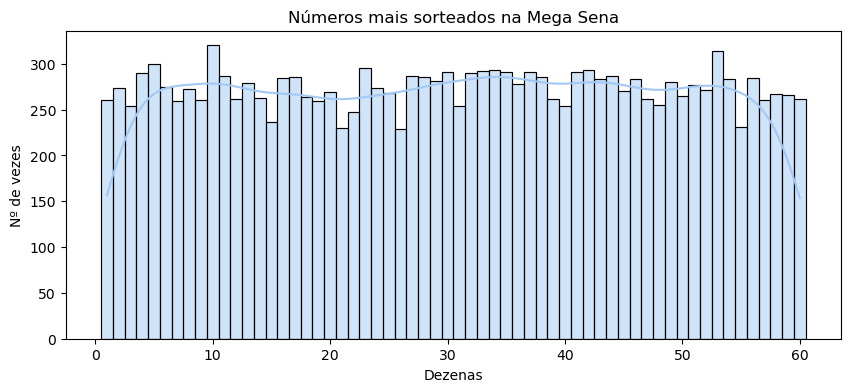

In [40]:
# Plotagem de histograma com biblioteca Seaborn para analisar a distribuição dos dados
ax, fig = plt.subplots(figsize=(10,4))
sns.histplot(mega, kde=True, legend=False, palette=('pastel'), stat='frequency', bins=60, discrete=True)
plt.title('Números mais sorteados na Mega Sena')
plt.xlabel('Dezenas')
plt.ylabel('Nº de vezes')
plt.show()

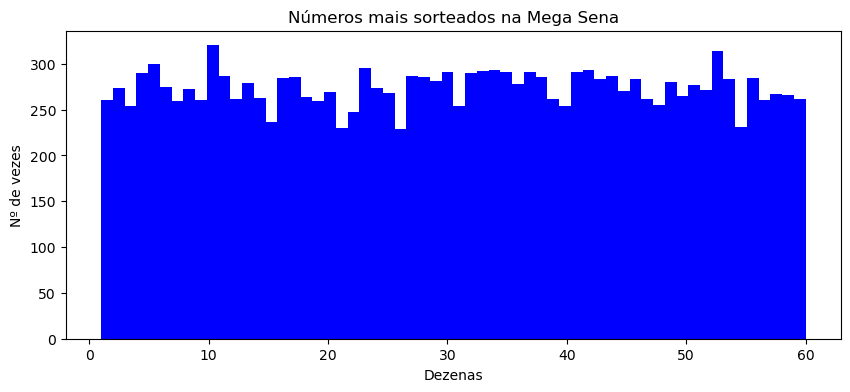

In [41]:
# Plotagem de histograma com biblioteca Matplotlib para analisar a distribuição dos dados
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(mega, bins=60, color='blue', histtype='bar', density=False)
plt.title('Números mais sorteados na Mega Sena')
plt.xlabel('Dezenas')
plt.ylabel('Nº de vezes')
plt.show()